Aviation Flight Fare Prediction Model

##  Importing Libraries <a name="importing-libraries"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import category_encoders as ce

In [7]:
from sklearn.pipeline import Pipeline

##  Loading Data <a name="loading-data"></a>

In [8]:
df = pd.read_csv("Train set.csv")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#  Discovering Data <a name="discovering-data"></a>

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##  Missing Values <a name="missing-values"></a>

In [11]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
#drop missing values
df.dropna(inplace=True)

In [13]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##  Duplicates <a name="duplicates"></a>

In [14]:
df.duplicated().sum()

220

In [15]:
# drop the duplicate rows only
df.drop_duplicates(inplace=True, keep='first')

In [16]:
df.duplicated().sum()

0

#  EDA <a name="eda"></a>

##  Categorical Columns <a name="categorical-columns"></a>

##### 'Airline' Column

In [17]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
df['Airline'].nunique()

12

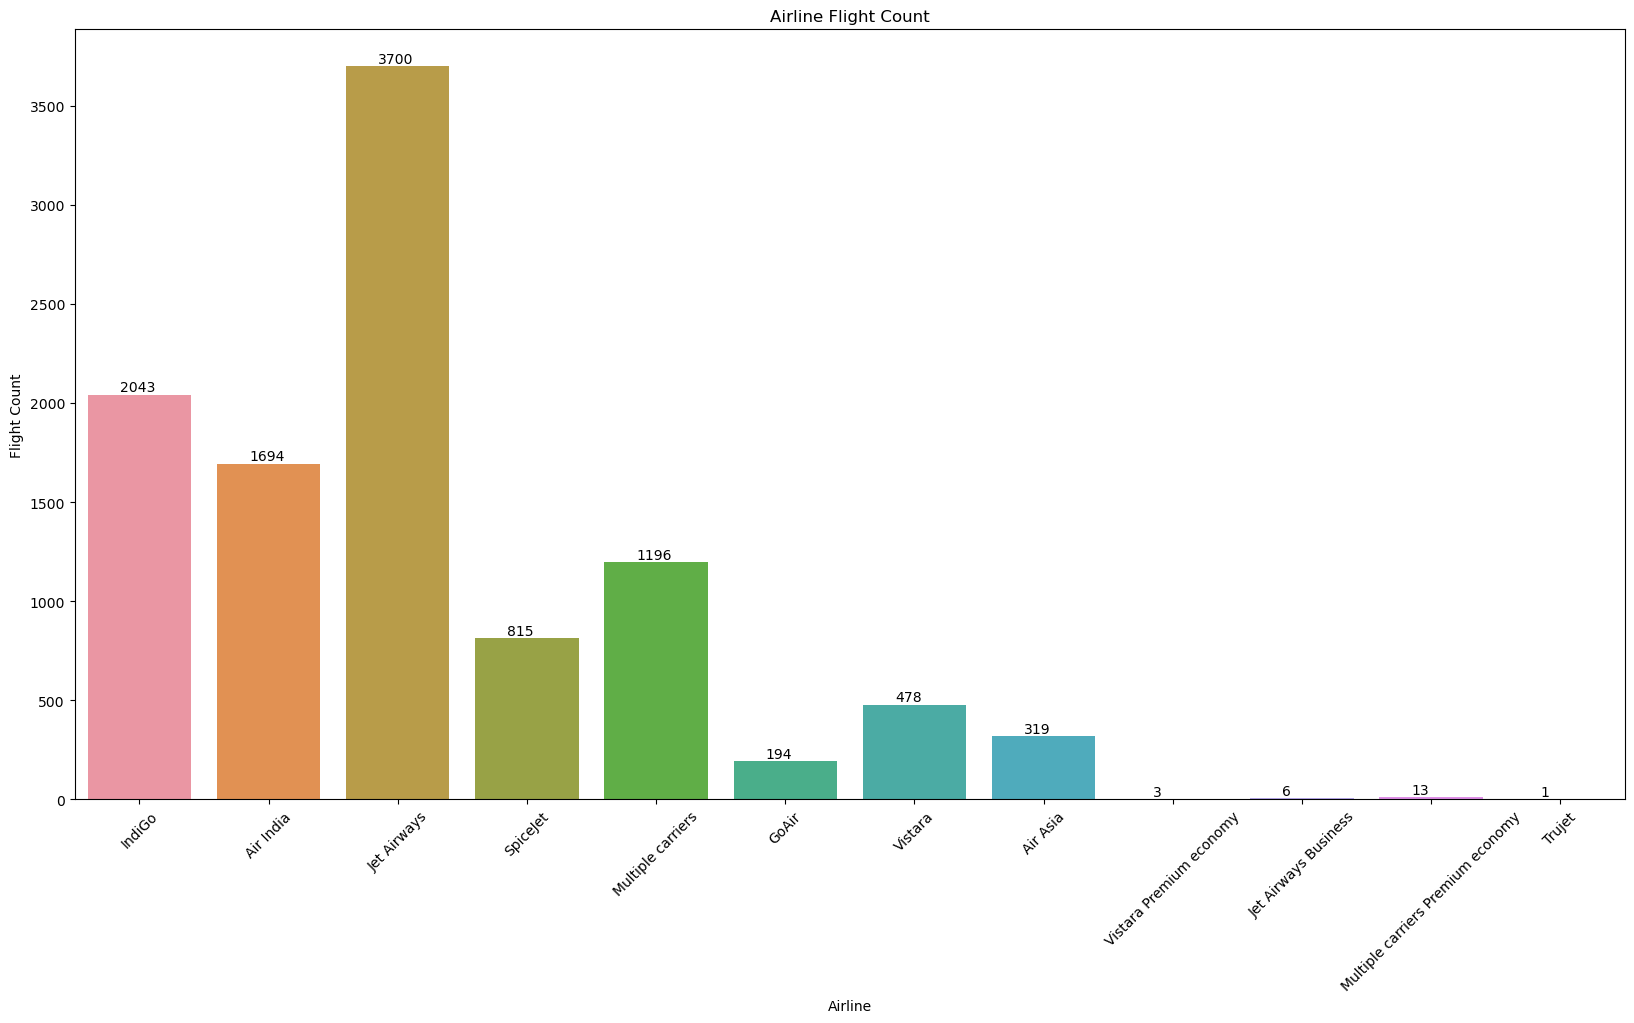

In [19]:
# Plotting Count Plot for Airlines
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Airline')
# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.title('Airline Flight Count')
plt.xticks(rotation = 45)
# display numbers on the plot
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

##### 'Additional_Info' Column

In [20]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [21]:
# replace No Info with No info
df['Additional_Info'] = df['Additional_Info'].str.replace('Info', 'info')

In [22]:
df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [23]:
df['Additional_Info'].nunique()

9

##### 'Destination' Column

In [24]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

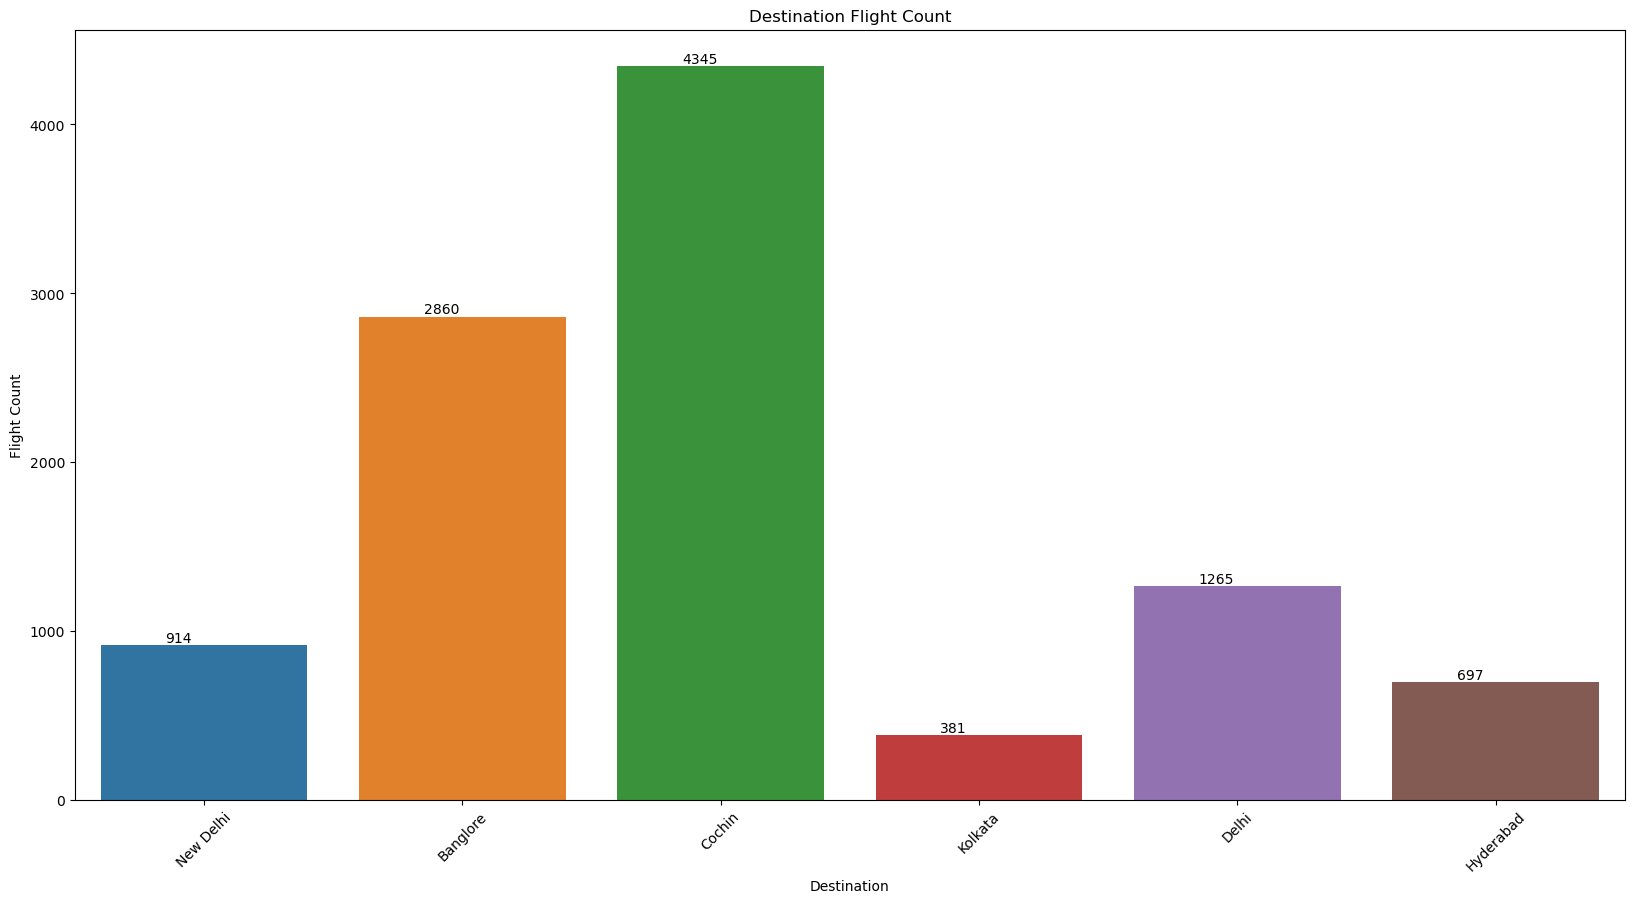

In [25]:
# Plotting count plot for destination Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Destination')

# Set labels and title for the plot
plt.xlabel('Destination')
plt.ylabel('Flight Count')
plt.title('Destination Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [26]:
df['Destination'].nunique()

6

##### 'Source' Column

In [27]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

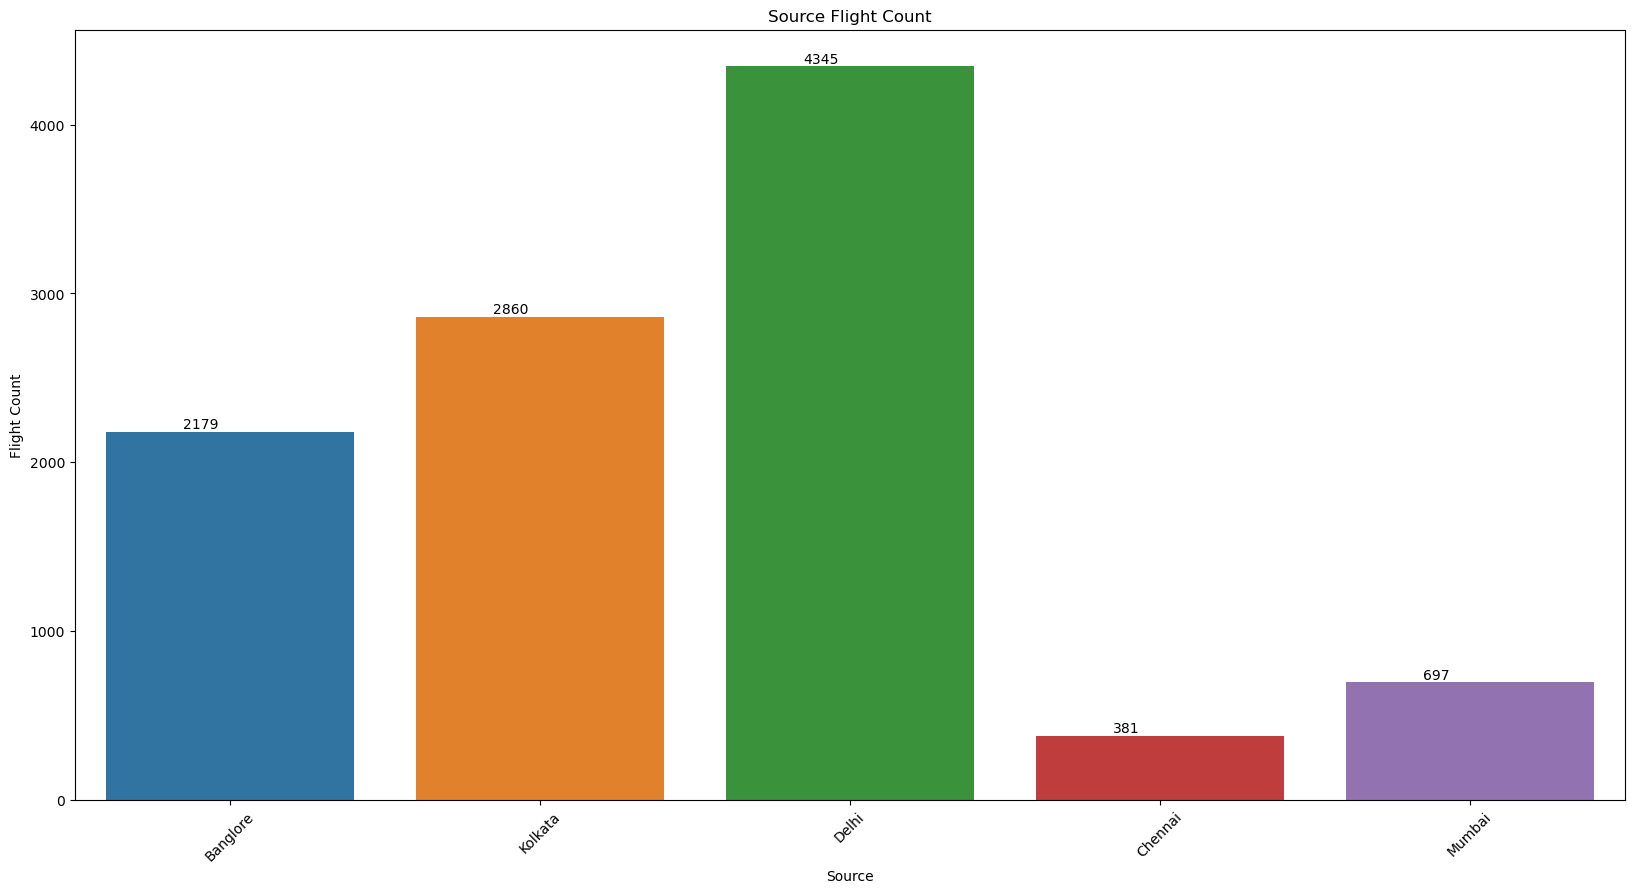

In [28]:
#Plotting count Plot for Source of Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Source')
# Set labels and title for the plot
plt.xlabel('Source')
plt.ylabel('Flight Count')
plt.title('Source Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [29]:
df['Source'].nunique()

5

##### 'Route' Column

In [30]:
df['Route'].nunique()

128

##### 'Total_Stops' Column

In [31]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
# delete stop word and keep number of stops only
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop','0').str.replace(' ', '')\
                                     .str.replace('stop','').str.replace('s','')

In [33]:
df['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

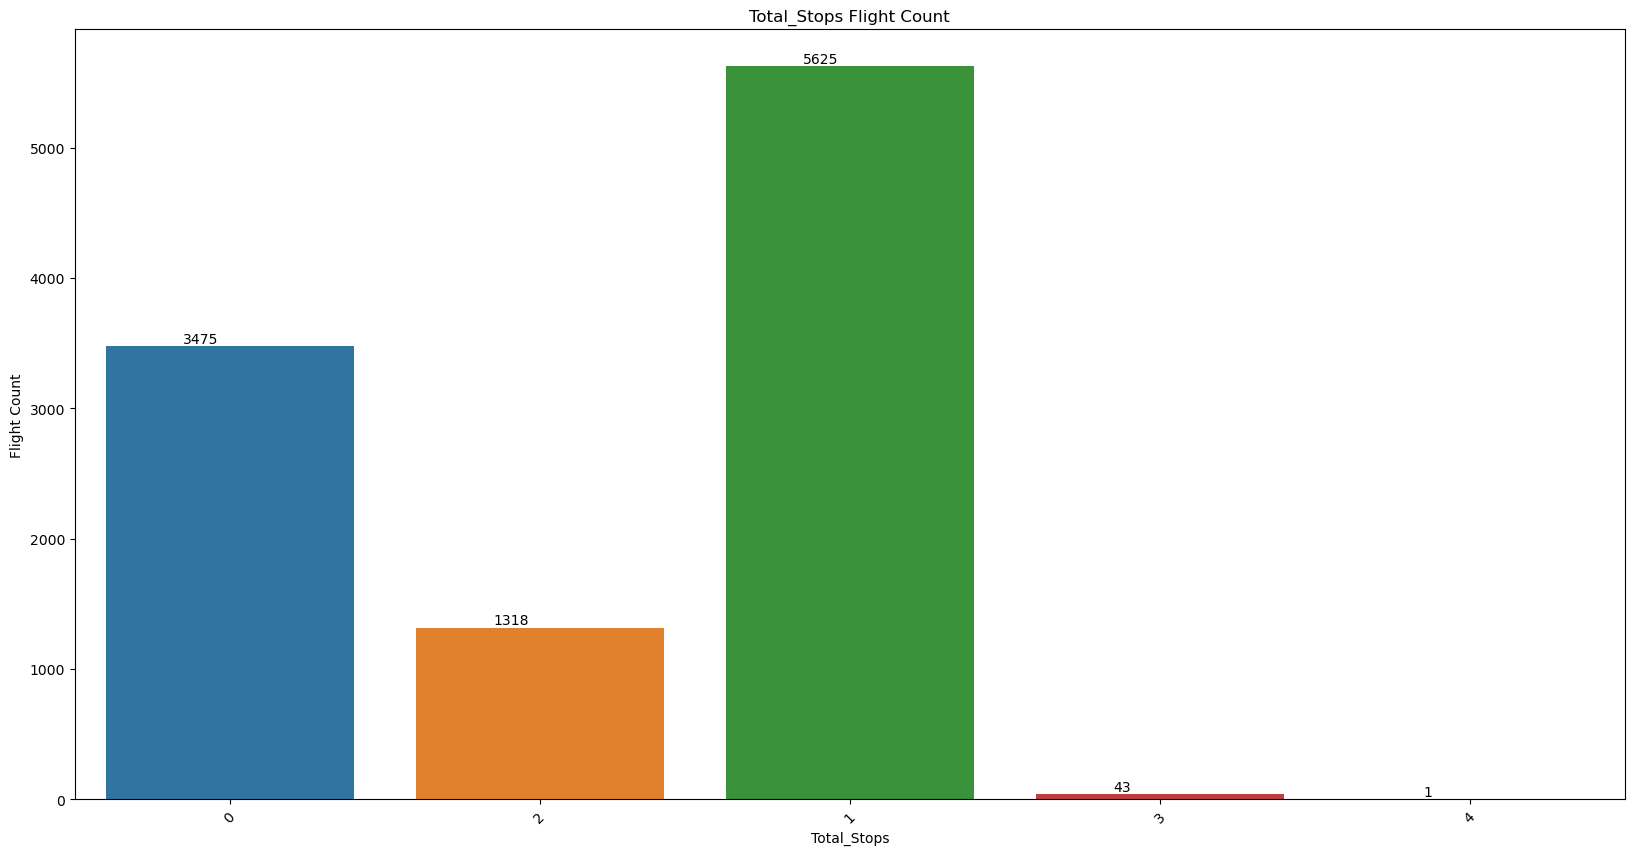

In [34]:
#Plotting count plot for stops in Flights
plt.figure(figsize =(20,10))
ax=sns.countplot(data=df, x='Total_Stops')
# Set labels and title for the plot
plt.xlabel('Total_Stops')
plt.ylabel('Flight Count')
plt.title('Total_Stops Flight Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
# Display the plot
plt.show()

In [35]:
df['Total_Stops'].nunique()

5

##  Numerical Columns <a name="numerical-columns"></a>

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


##### 'Duration' Column

In [37]:
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [38]:
# convert hours to minutes and delete 'h, m'.
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '')
# convert the column to int data type
df['Duration'] = df['Duration'].apply(eval).astype('int64')

In [39]:
df['Duration'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration, dtype: int64

##  Time Columns <a name="time-columns"></a>

#### 'Date_of_Journey' Column

In [40]:
# Extract day, month, and year from 'Date_of_Journey' column
df[['Day', 'Month', 'Year']] = df['Date_of_Journey'].str.split('/', expand=True)

In [41]:
# check values of days
df['Day'].value_counts()

9     1275
6     1173
27    1092
21    1085
24    1022
15     967
12     946
1      907
18     814
3      743
01     151
09     100
06      95
03      92
Name: Day, dtype: int64

In [42]:
# delete 0 from the day number
df['Day'] = df['Day'].str.replace('0', '')

In [43]:
df['Day'].unique()

array(['24', '1', '9', '12', '27', '18', '3', '15', '6', '21'],
      dtype=object)

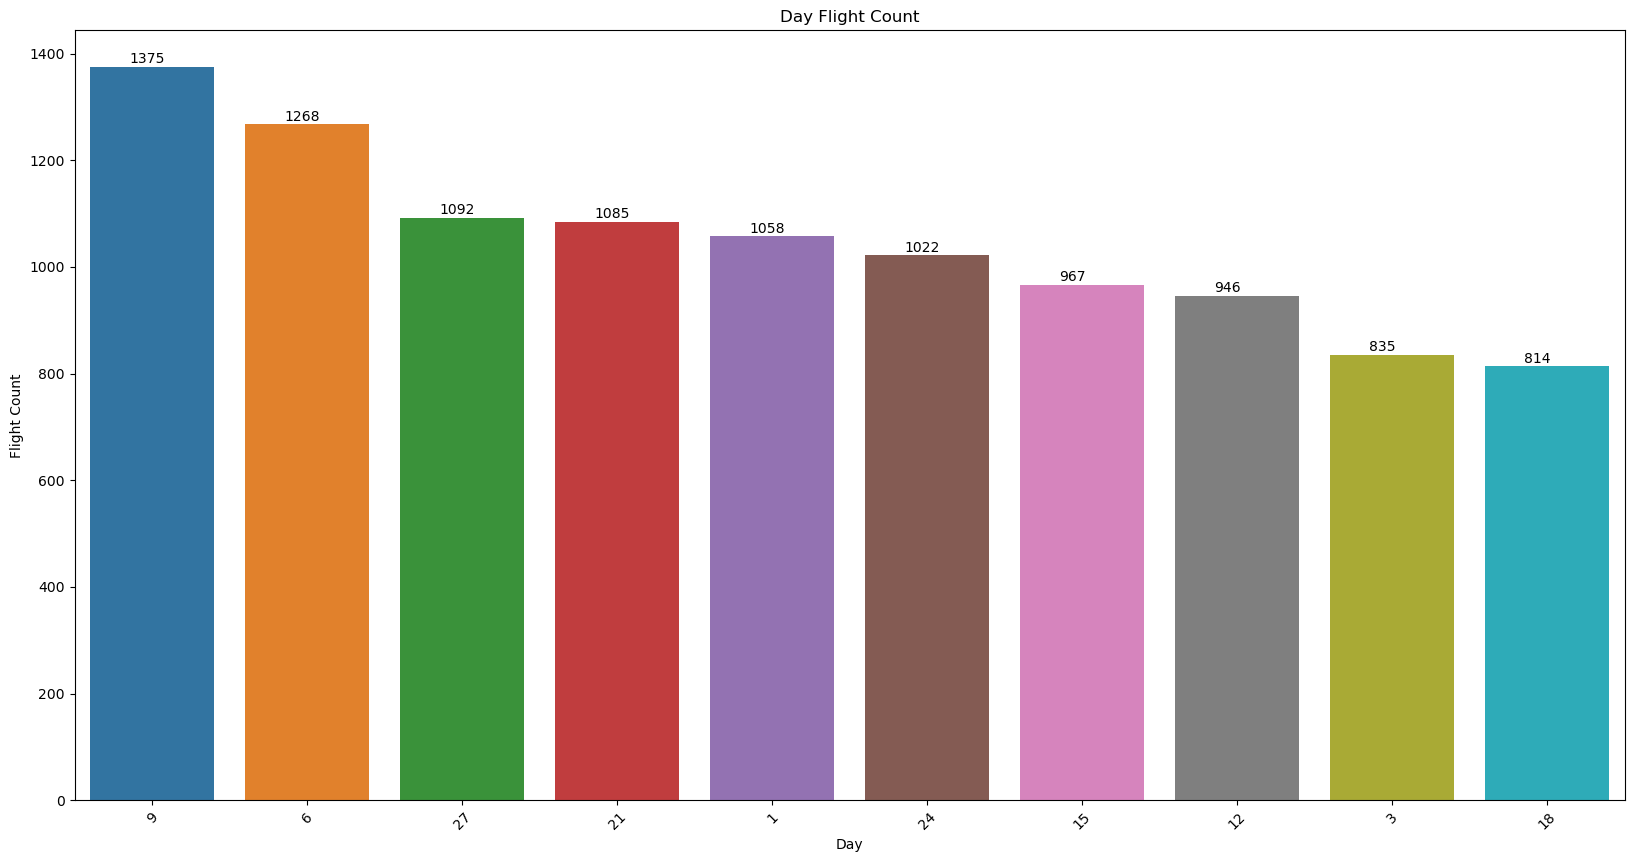

In [44]:
# Plotting count Plot for Day flights
plt.figure(figsize=(20, 10))
sorted_df = df['Day'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Day', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Flight Count')
plt.title('Day Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

# Display the plot
plt.show()

In [45]:
# check values of Months
df['Month'].value_counts()

05    3395
06    3311
03    2678
04    1078
Name: Month, dtype: int64

In [46]:
# delete 0 from the Month number
df['Month'] = df['Month'].str.replace('0', '')

In [47]:
df['Month'].unique()

array(['3', '5', '6', '4'], dtype=object)

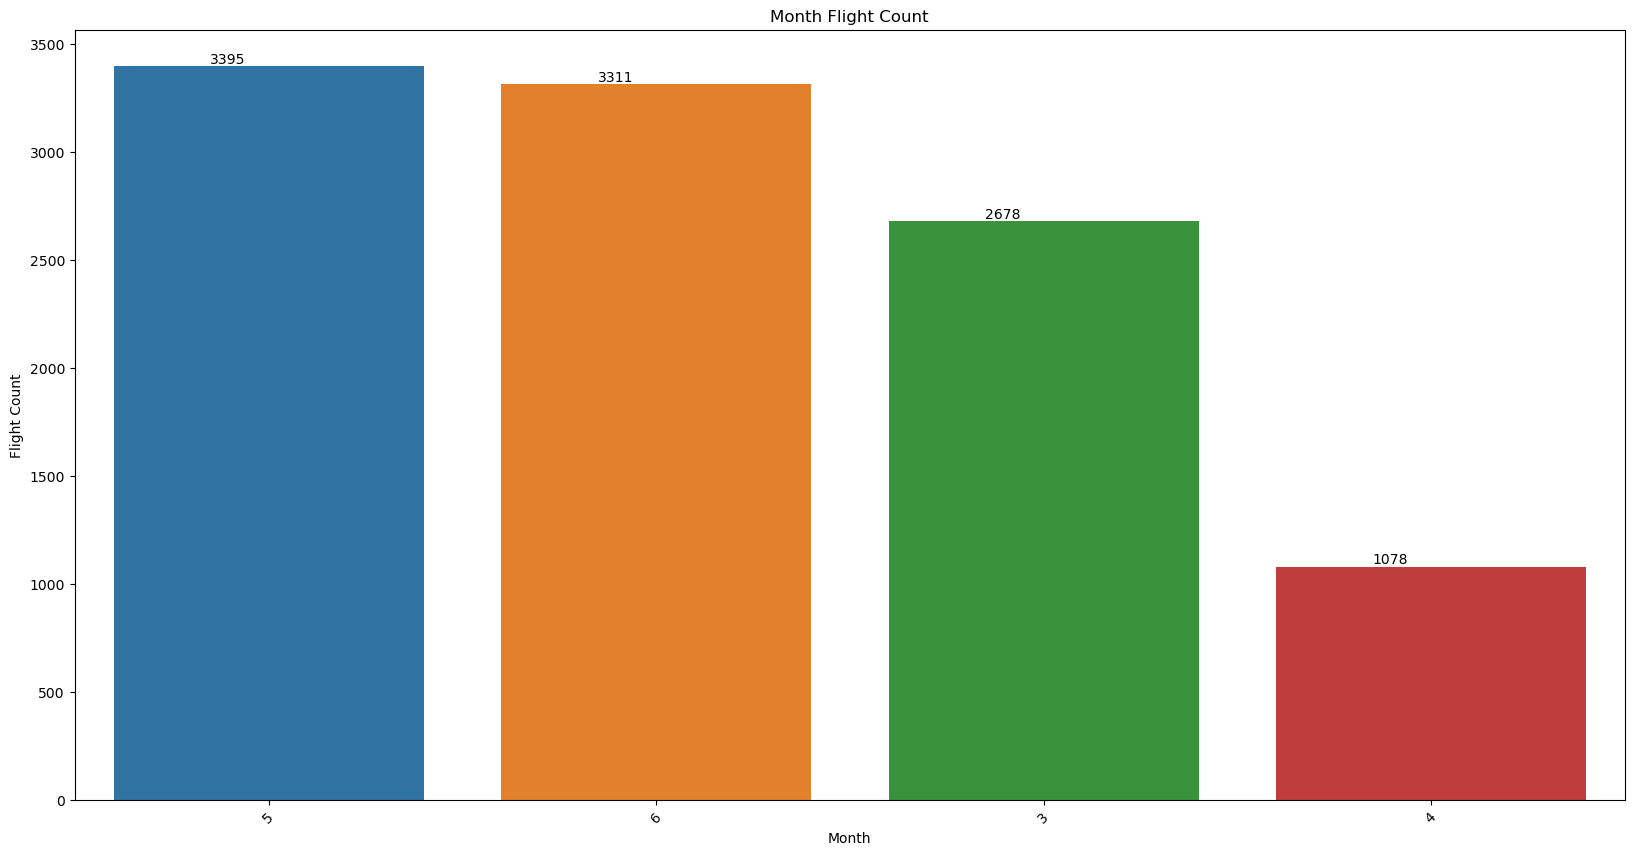

In [48]:
# Plotting count Plot for Month flights
plt.figure(figsize=(20, 10))
sorted_df = df['Month'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Month', order=sorted_df.index)

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Month Flight Count')
plt.xticks(rotation=45)

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

# Display the plot
plt.show()

In [49]:
# # check values of Years
df['Year'].value_counts()

2019    10462
Name: Year, dtype: int64

#### 'Dep_Time' Column

In [50]:
# convert Dep_Time column to datetime object
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [51]:
# increase the hour if the minutes above 30
def apro_time(time):
    adjusted_time = time + pd.DateOffset(hours=1) if time.minute > 30 else time
    
    return adjusted_time.hour

In [52]:
# apply 'apro_time' on 'Dep_Time' column
df['Dep_Hour'] = df['Dep_Time'].apply(apro_time)

##  Dropping Unimportant Columns <a name="dropping-unimportant-columns"></a>

In [53]:
# delete unimportant columns
df = df.drop(['Date_of_Journey', 'Route', 'Arrival_Time', 'Dep_Time', 'Year'], axis=1)

In [54]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,17


In [55]:
# Save Cleaned data
df.to_csv('cleaned_df.csv')

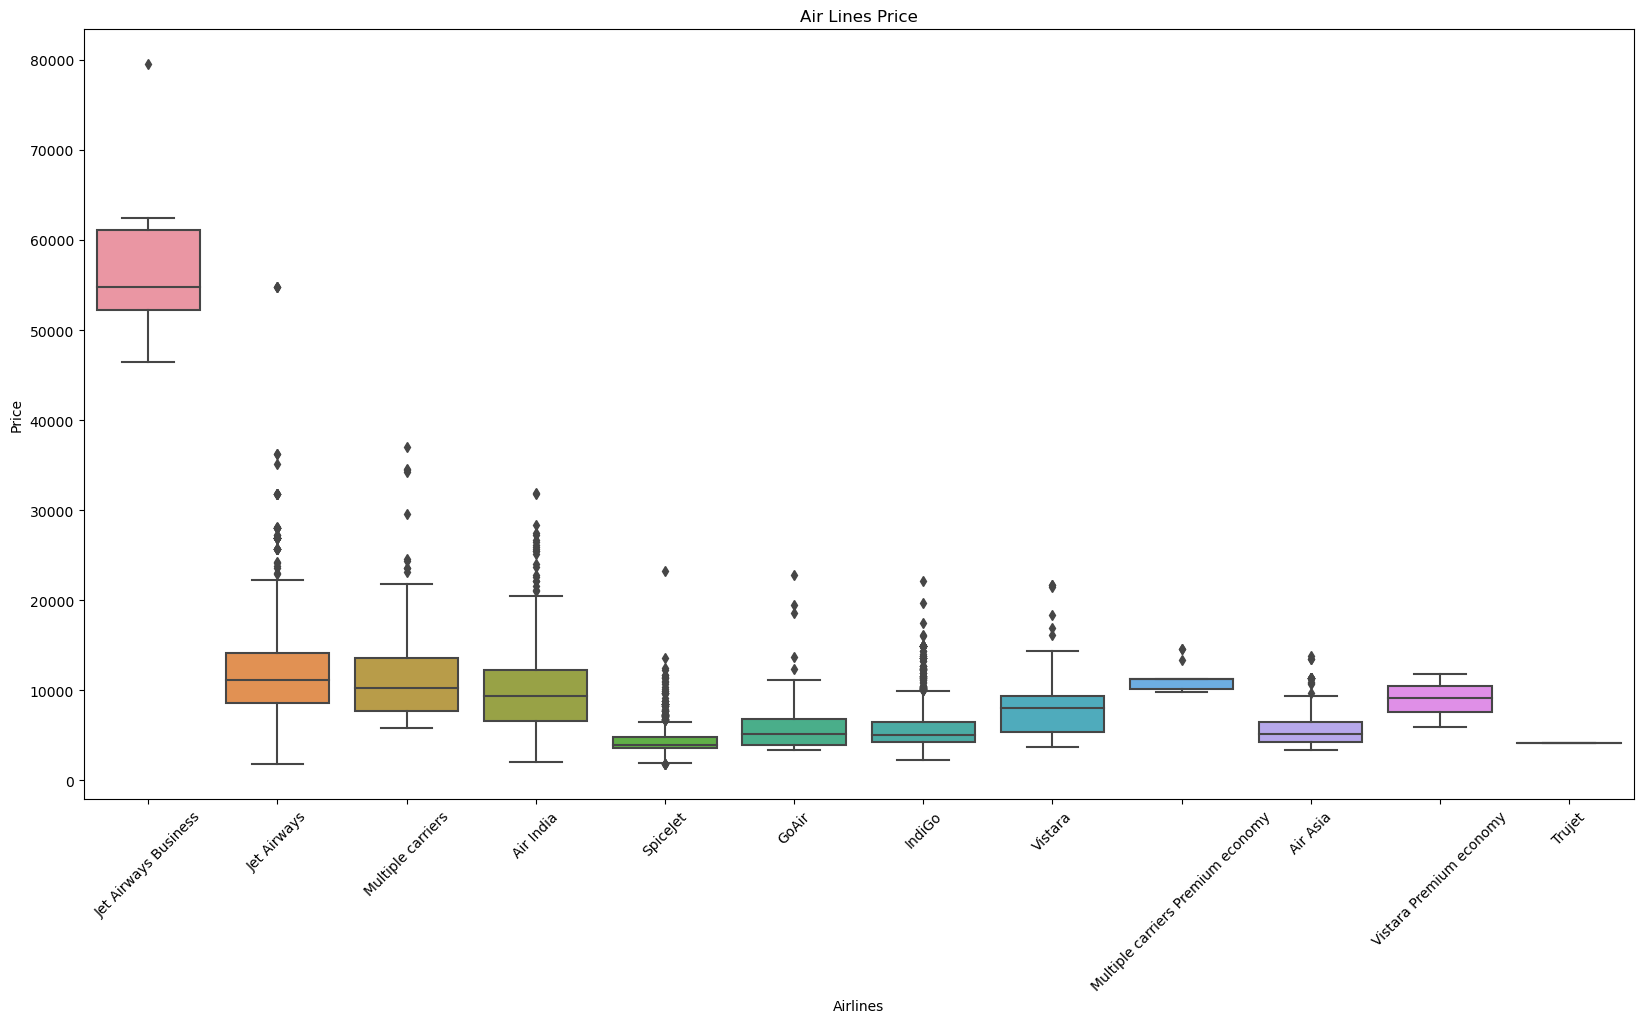

In [56]:
# Air line Prices
plt.figure(figsize=(20,10))

#Plotting box plot for price for each airline
sns.boxplot(data=df.sort_values('Price',ascending=False), x='Airline', y='Price')

# Set labels and title for the plot
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Air Lines Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

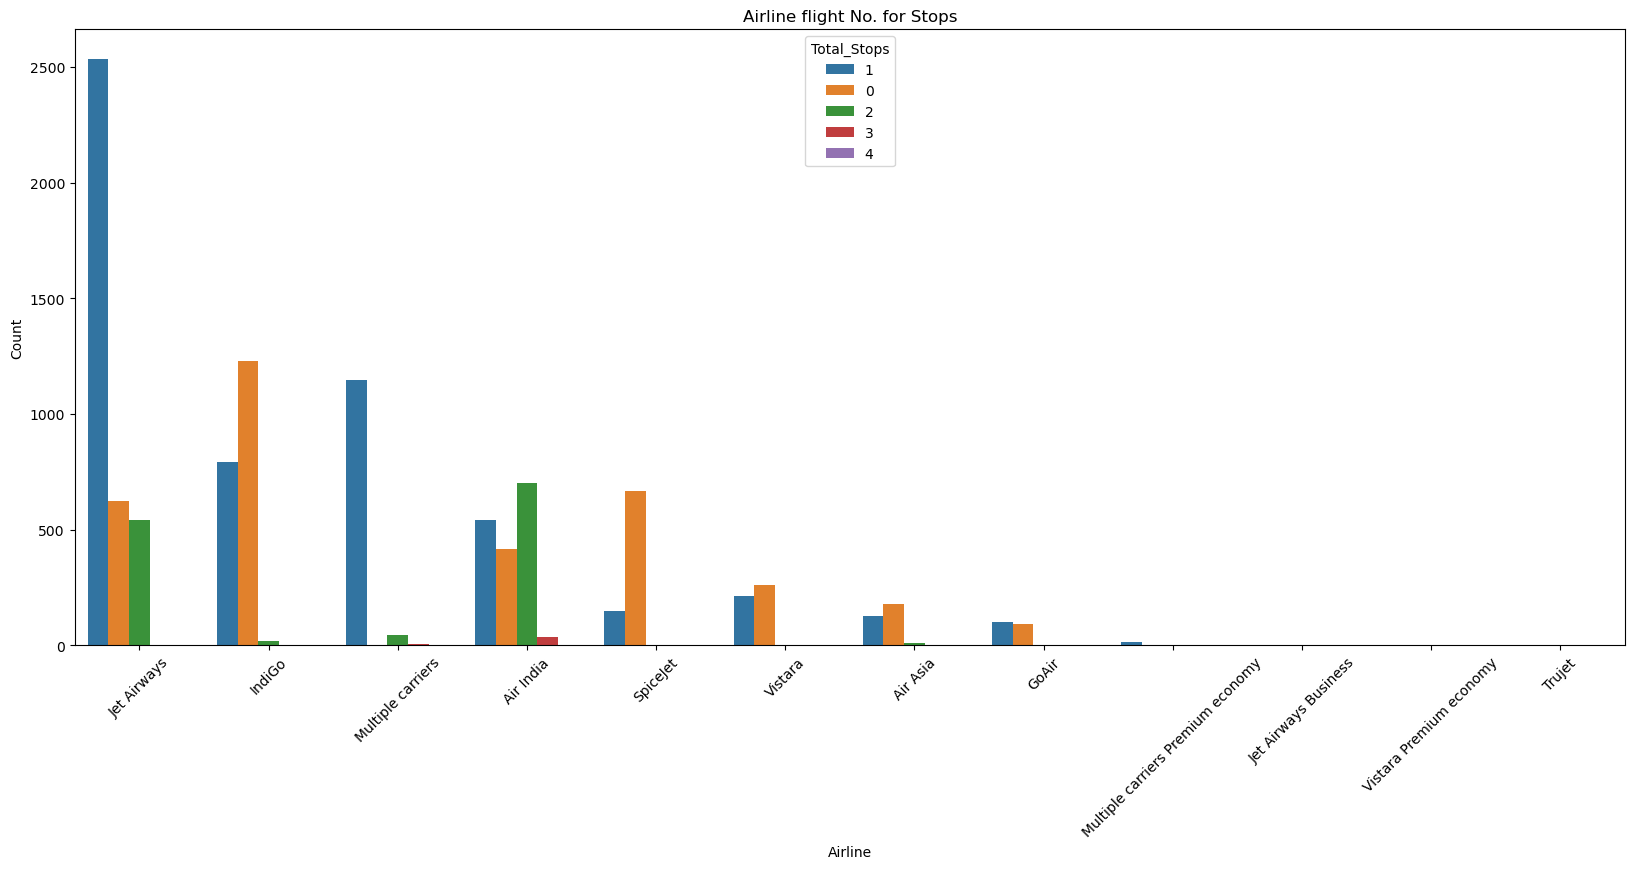

In [57]:
# Airline flights per stops
plt.figure(figsize =(20,8))

#Plotting Bar plot for No. of flights for each airline regarding to Flight stops
grouped_counts = df.groupby(['Airline', 'Total_Stops'])\
                .size().sort_values(ascending=False).reset_index(name='Count')

sns.barplot(data=grouped_counts, x='Airline', y='Count', hue='Total_Stops')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline flight No. for Stops')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

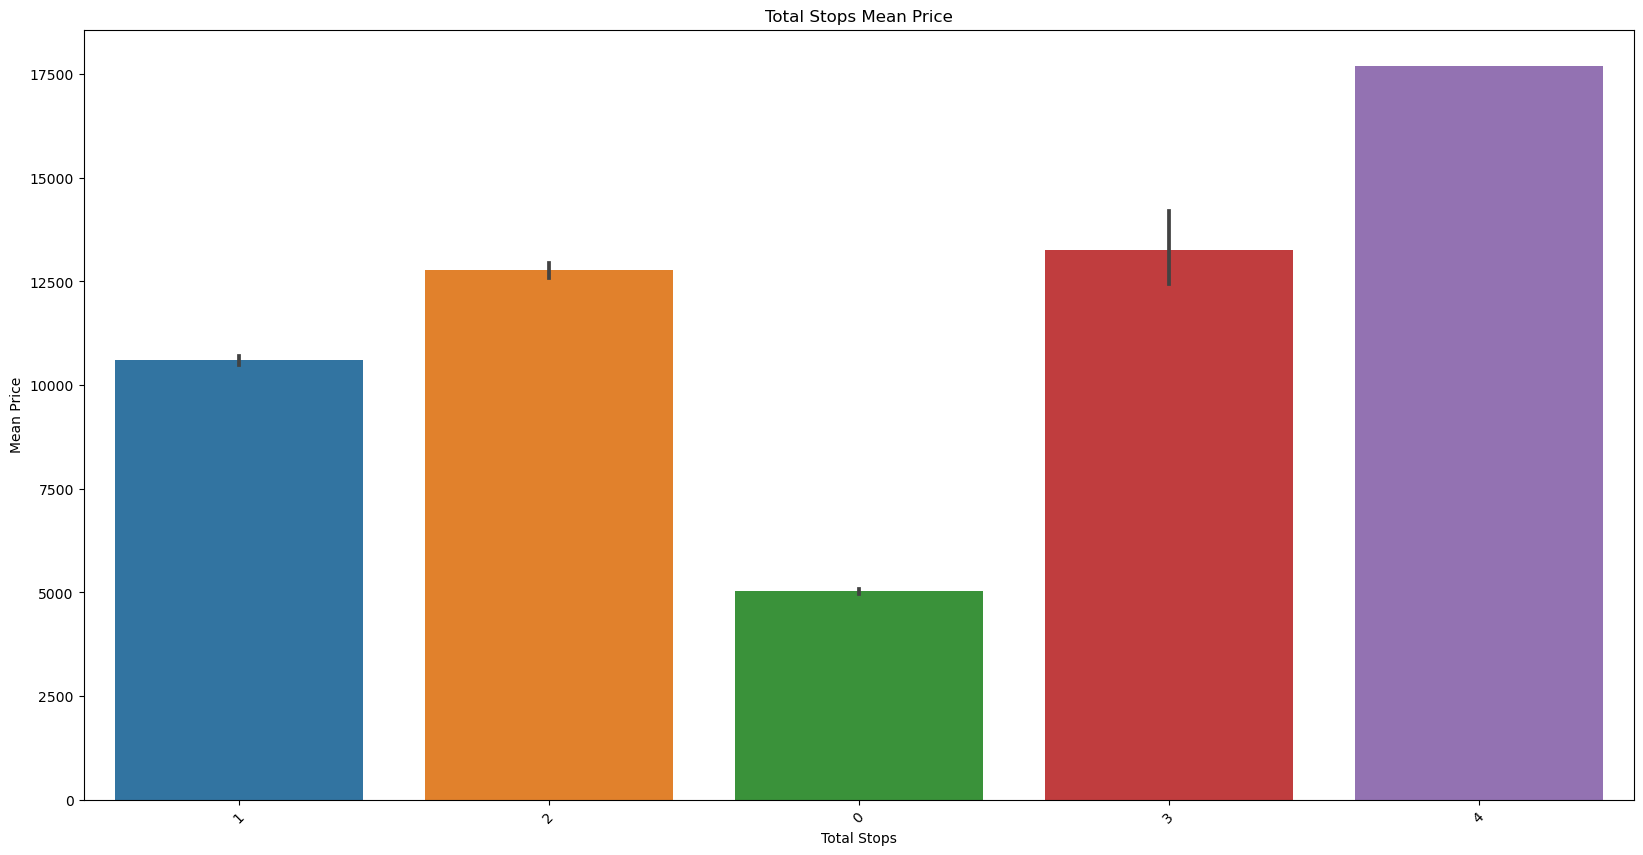

In [58]:
# Total_Stops vs Price
plt.figure(figsize=(20,10))

sns.barplot(data=df.sort_values('Price',ascending=False), x='Total_Stops', y='Price')

# Set labels and title for the plot
plt.xlabel('Total Stops')
plt.ylabel('Mean Price')
plt.title('Total Stops Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

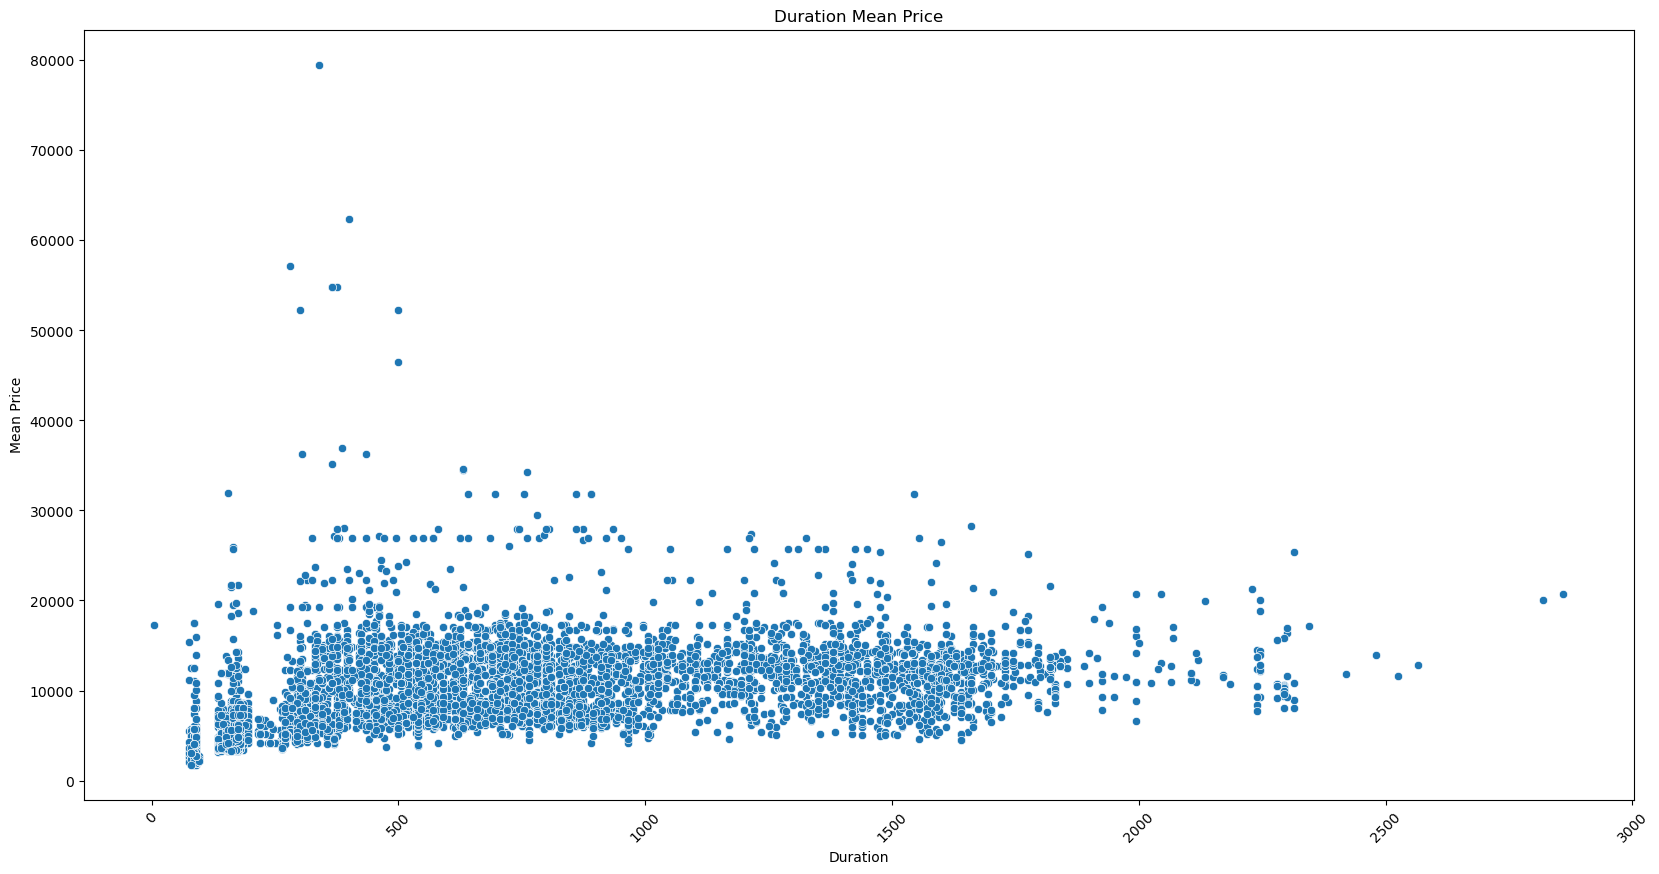

In [59]:
# Duration vs Price
plt.figure(figsize=(20,10))

sns.scatterplot(data=df, x='Duration', y='Price')

# Set labels and title for the plot
plt.xlabel('Duration')
plt.ylabel('Mean Price')
plt.title('Duration Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

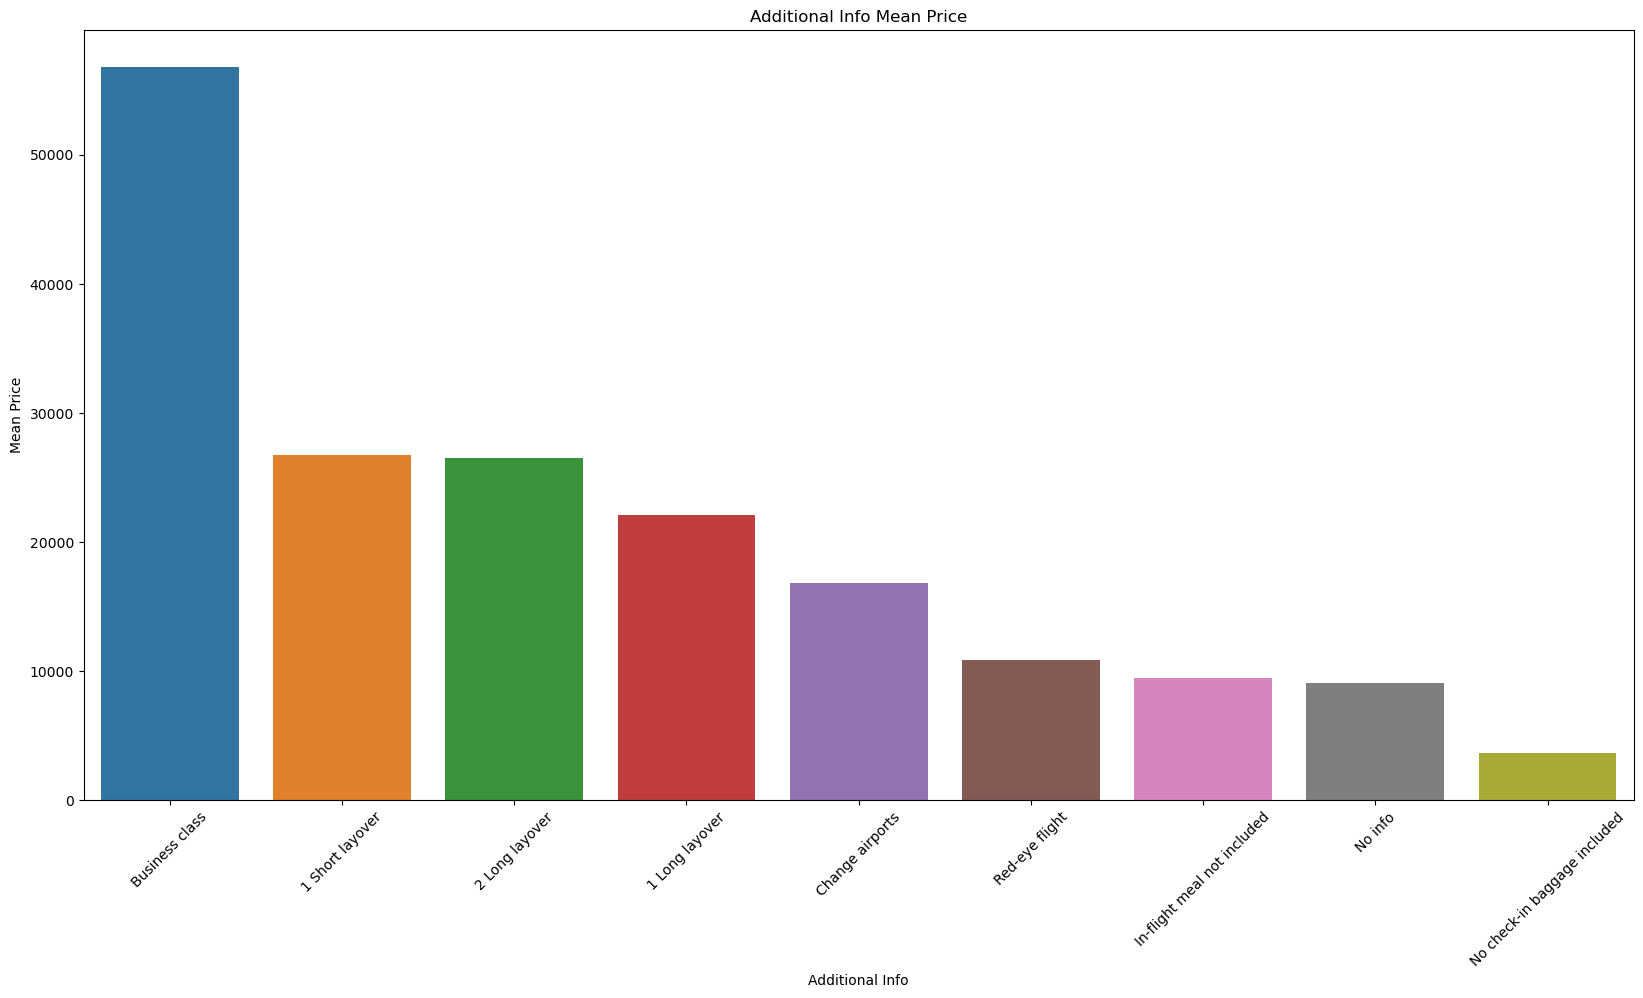

In [60]:
# Additional_Info vs Price
plt.figure(figsize=(20,10))

# Sort the DataFrame by mean price in descending order
sorted_df = df.groupby('Additional_Info')['Price'].mean()\
           .sort_values(ascending=False).reset_index()

sns.barplot(data=sorted_df, x='Additional_Info', y='Price')

# Set labels and title for the plot
plt.xlabel('Additional Info')
plt.ylabel('Mean Price')
plt.title('Additional Info Mean Price')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

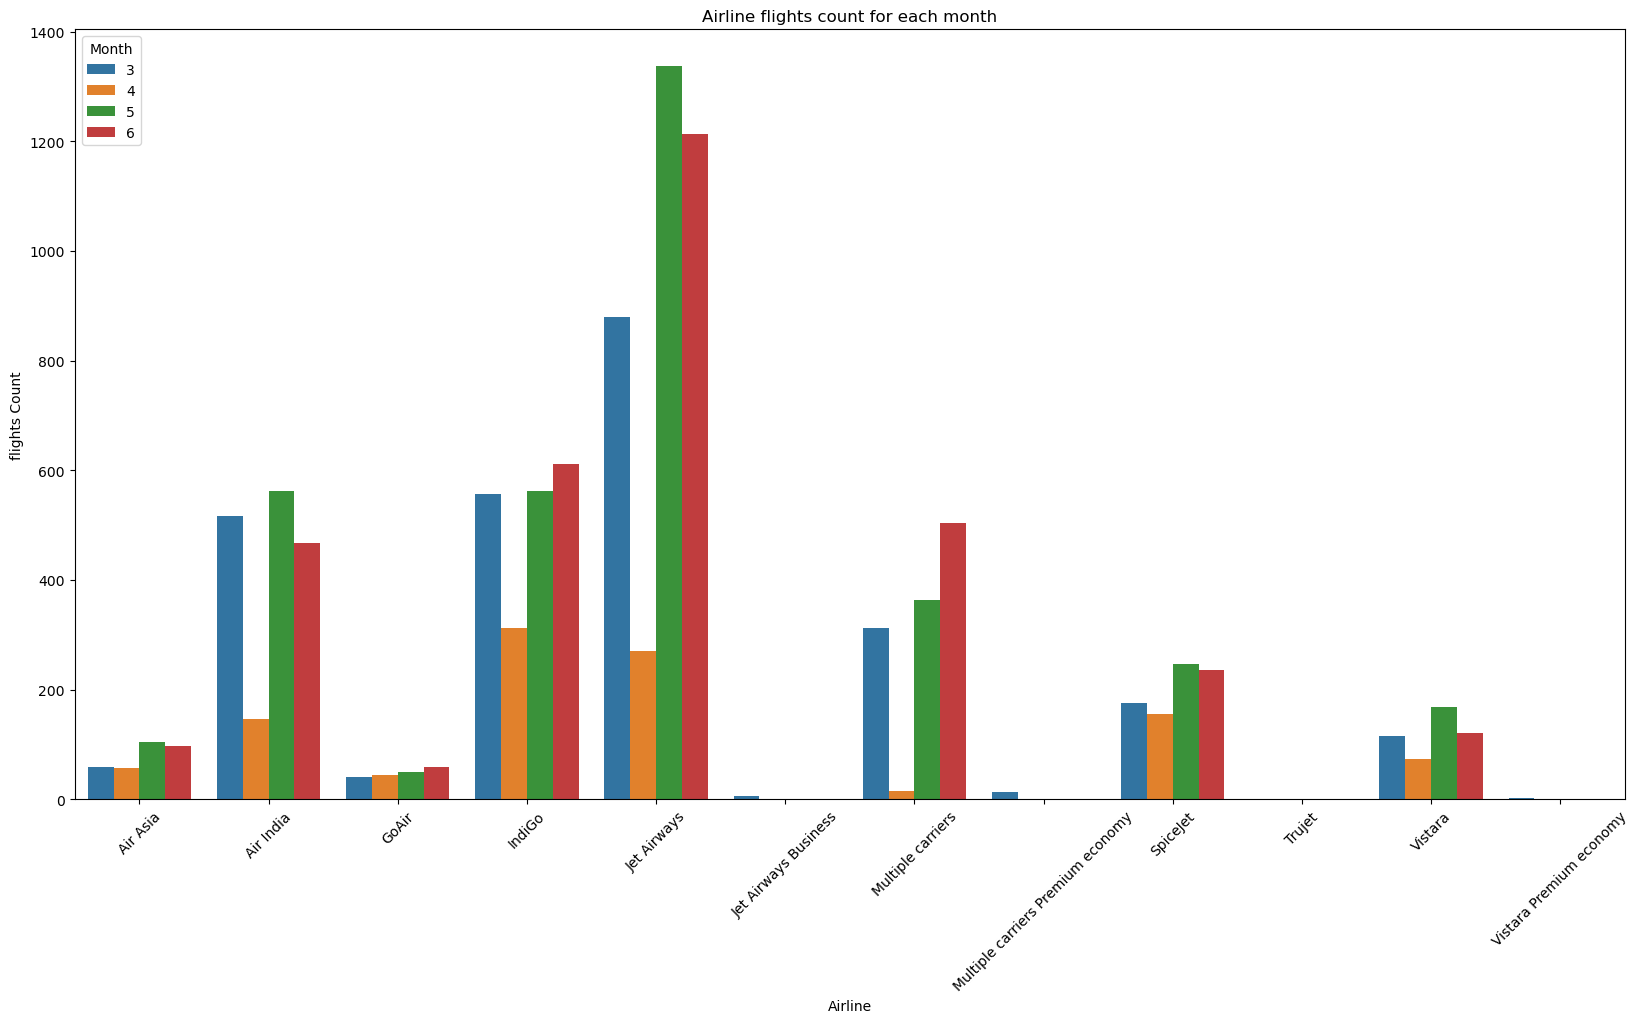

In [61]:
# Airline flights count for each month
plt.figure(figsize=(20,10))

sorted_df = df.groupby(['Airline', 'Month']).size().reset_index().rename(columns={0: 'Count'})

# Plot a Barplot
sns.barplot(data=sorted_df, x='Airline', y='Count', hue='Month')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('flights Count')
plt.title('Airline flights count for each month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

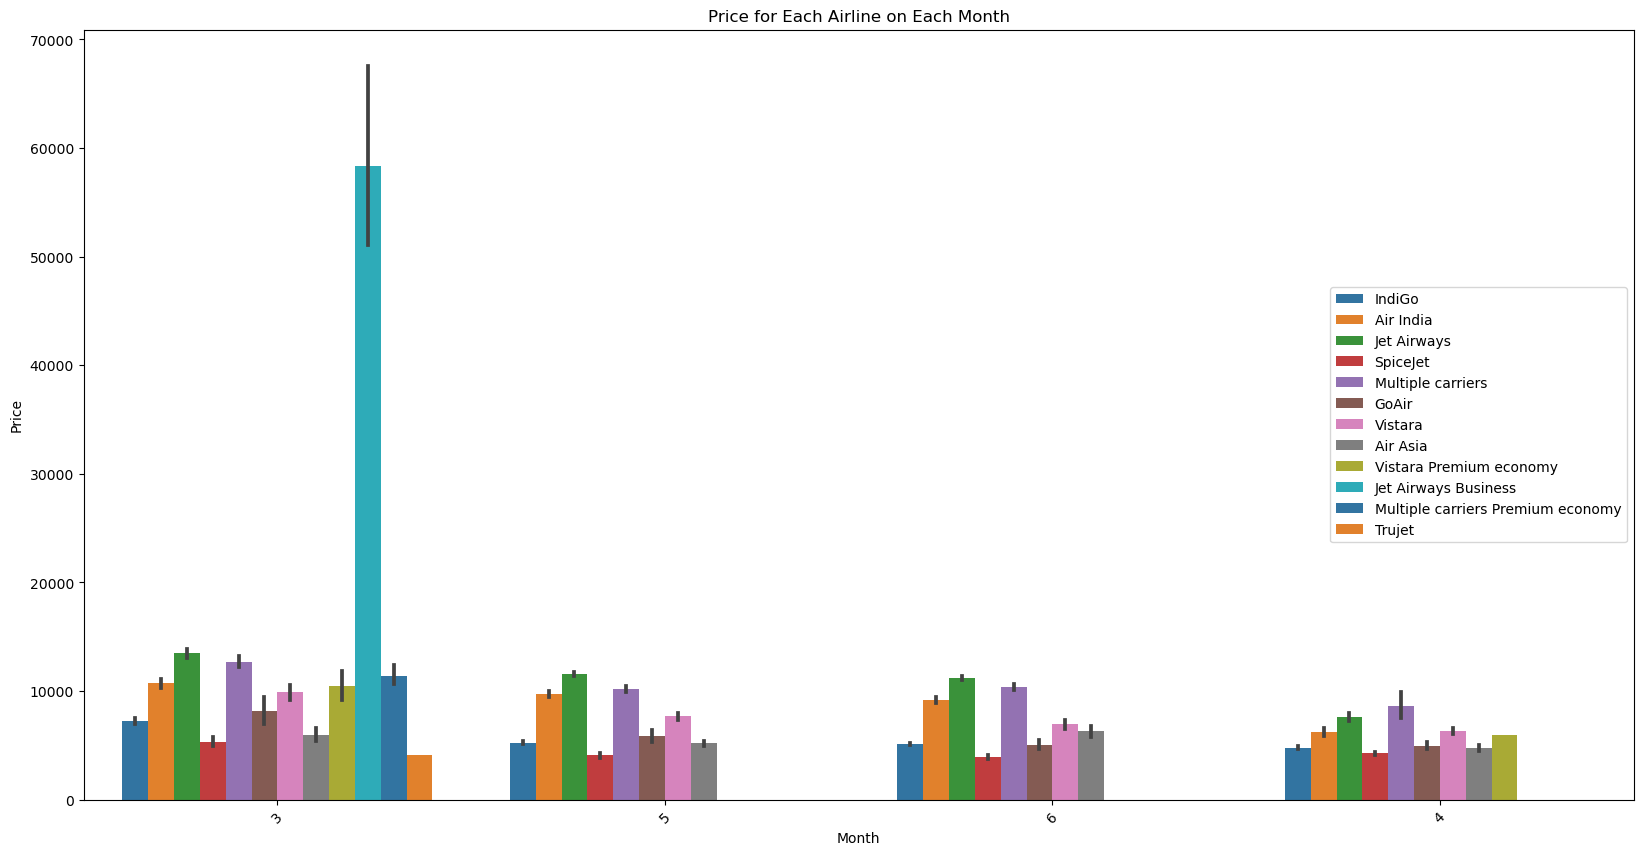

In [62]:
# Airline flights price for each month
plt.figure(figsize=(20, 10))

# Plot monthly prices with barplot
sns.barplot(data=df, x='Month', y='Price', hue='Airline',
              palette='tab10')

# Set labels and title for the plot
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Move the legend to the right
plt.legend(loc='center right')

# Display the plot
plt.show()

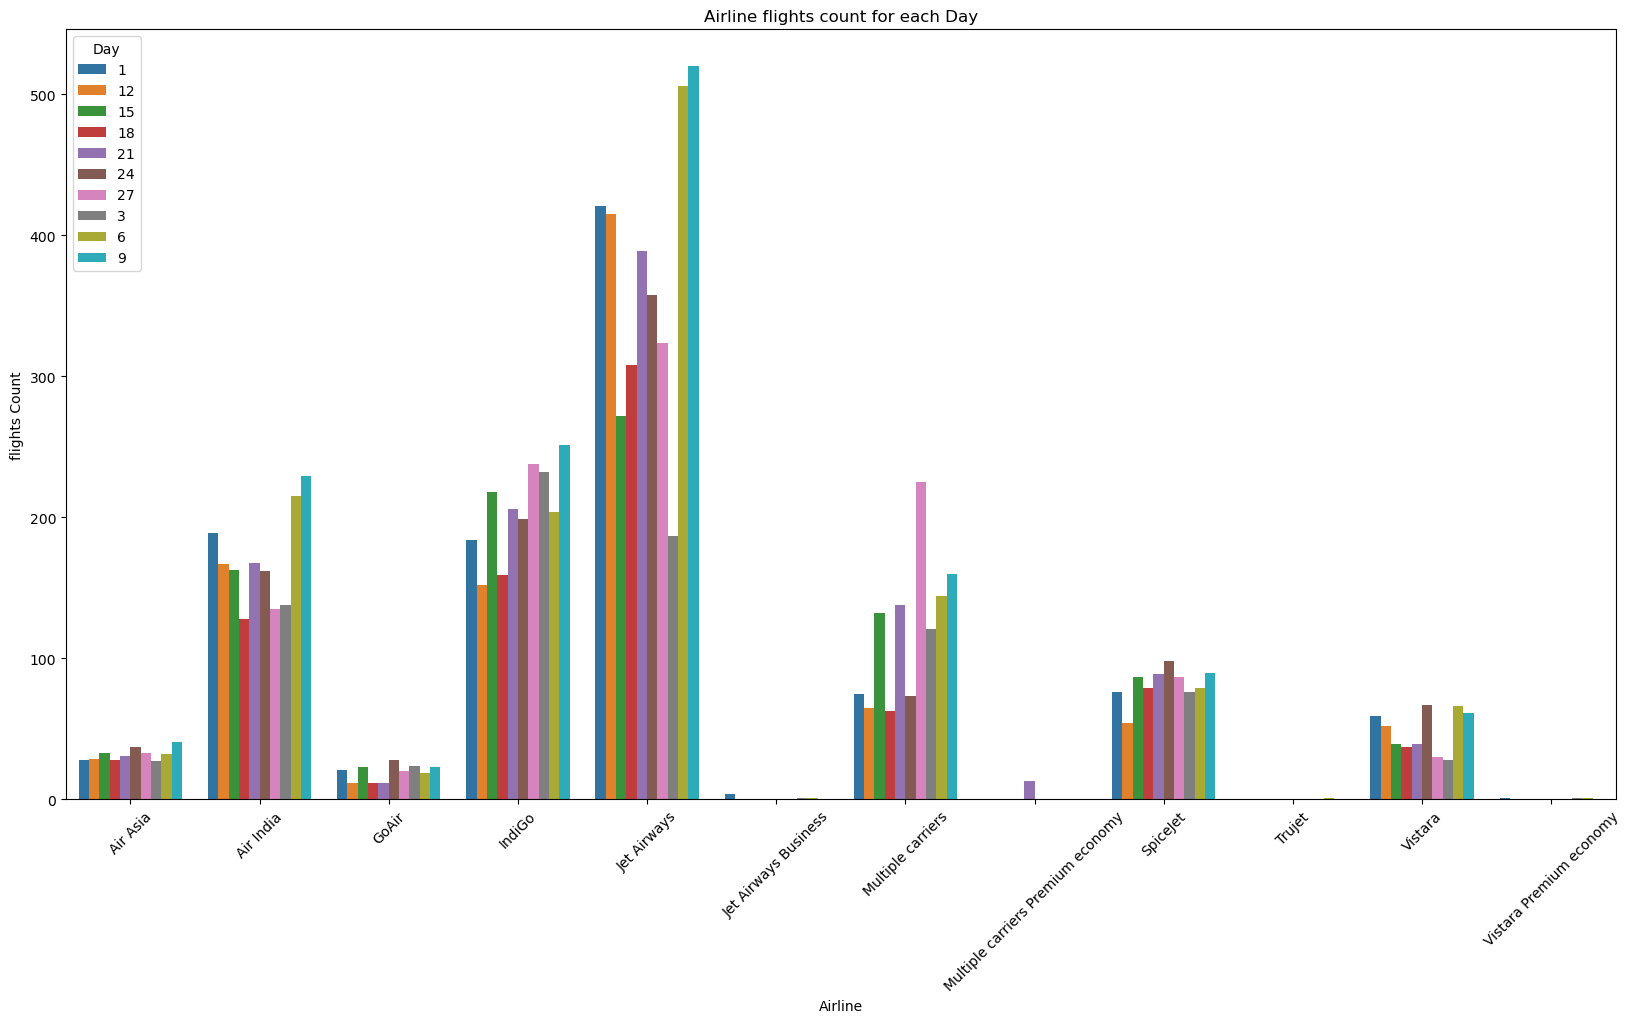

In [63]:
# Airline flights count for each Day
plt.figure(figsize=(20,10))
sorted_df = df.groupby(['Airline', 'Day']).size().reset_index().rename(columns={0: 'Count'})

# Plot a Barplot
sns.barplot(data=sorted_df, x='Airline', y='Count', hue='Day', palette='tab10')

# Set labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('flights Count')
plt.title('Airline flights count for each Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

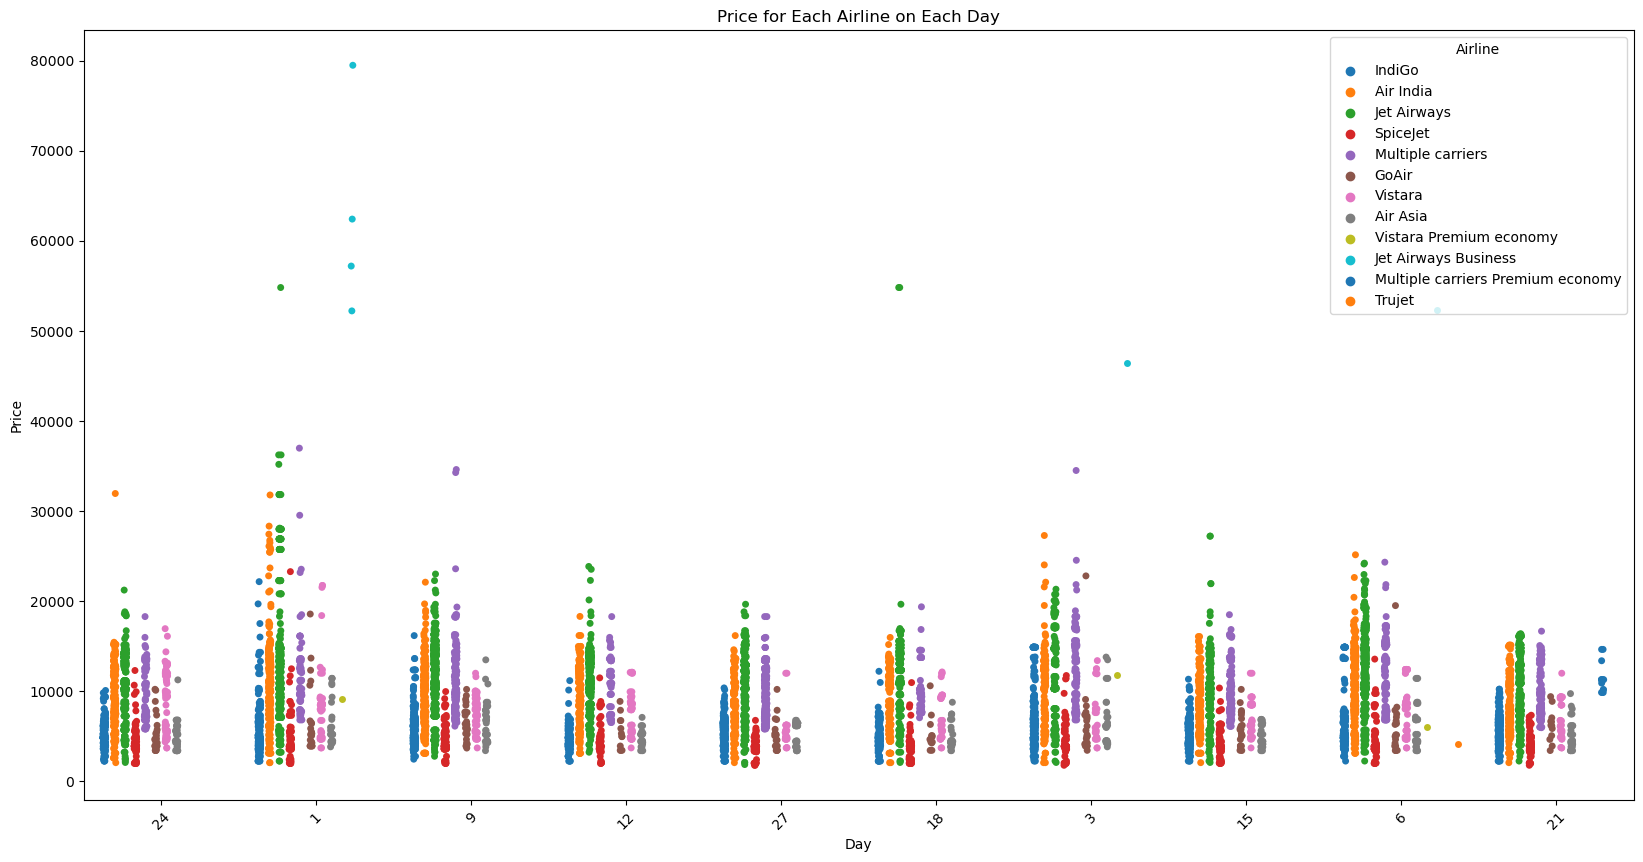

In [64]:
# Airline flights price for each Day
plt.figure(figsize=(20, 10))

# Plot individual prices with stripplot
sns.stripplot(data=df, x='Day', y='Price', hue='Airline',
              jitter=True, dodge=True, palette='tab10')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price for Each Airline on Each Day')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

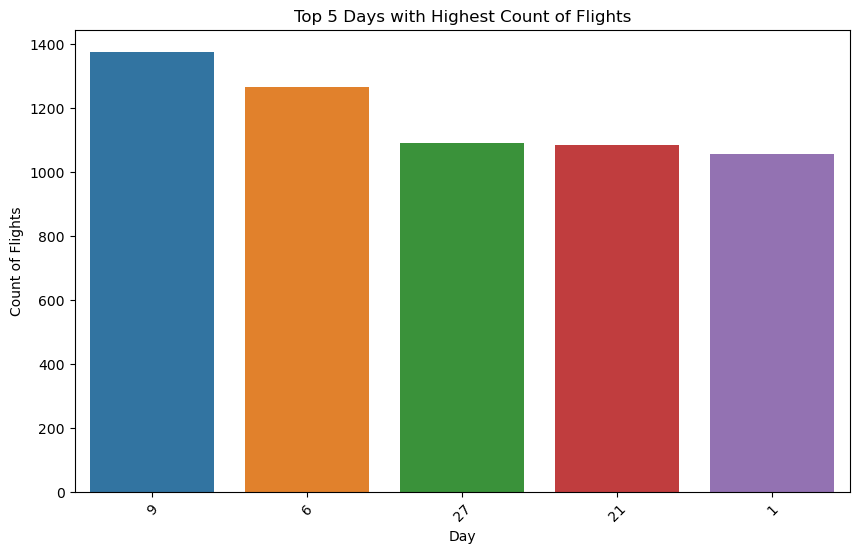

In [65]:
# Calculate the count of flights for each day
flight_counts = df['Day'].value_counts().reset_index()
flight_counts.columns = ['Day', 'Count']

# Sort the data in descending order based on the count of flights
sorted_counts = flight_counts.sort_values('Count', ascending=False)

# Select the top 5 days with the highest count
top_5_days = sorted_counts.head(5)

# Plot a bar chart to visualize the count of flights for the top 5 days
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_days, x='Day', y='Count')

# Set labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Count of Flights')
plt.title('Top 5 Days with Highest Count of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

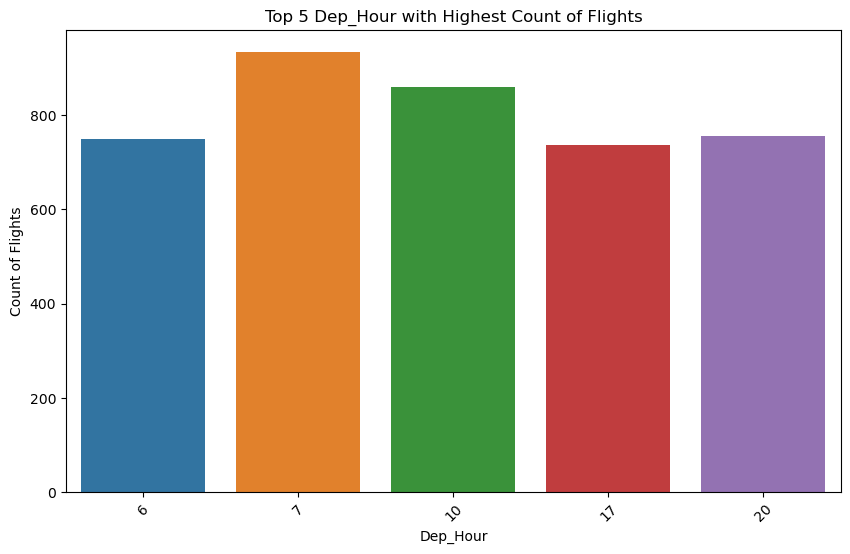

In [66]:
# Calculate the count of flights for each Hour
flight_counts = df['Dep_Hour'].value_counts().reset_index()
flight_counts.columns = ['Dep_Hour', 'Count']

# Sort the data in descending order based on the count of flights
sorted_counts = flight_counts.sort_values('Count', ascending=False)

# Select the top 5 days with the highest count
top_5_days = sorted_counts.head(5)

# Plot a bar chart to visualize the count of flights for the top 5 Hour
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_days, x='Dep_Hour', y='Count')

# Set labels and title for the plot
plt.xlabel('Dep_Hour')
plt.ylabel('Count of Flights')
plt.title('Top 5 Dep_Hour with Highest Count of Flights')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

#  Feature Engineering <a name="feature-engineering"></a> 

In [67]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,6
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,17


####  Scaling <a name="scaling"></a>

In [68]:
# scaler object
sc = StandardScaler()

In [69]:
# Scaling 'Duration' Column
df['Duration'] = sc.fit_transform(df['Duration'].values.reshape(-1, 1))

In [70]:
# Scaling 'Dep_Hour' Column
df['Dep_Hour'] = sc.fit_transform(df['Dep_Hour'].values.reshape(-1, 1))

In [72]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,-0.918323,0,No info,3897,24,3,1.608027
1,Air India,Kolkata,Banglore,-0.369065,2,No info,7662,1,5,-1.178392
2,Jet Airways,Delhi,Cochin,1.019061,2,No info,13882,9,6,-0.655938
3,IndiGo,Kolkata,Banglore,-0.608741,1,No info,6218,12,5,0.911422
4,IndiGo,Banglore,New Delhi,-0.688633,1,No info,13302,1,3,0.737271


####  Encoding <a name="encoding"></a>

#### 'Airline' Column

In [75]:
# create Label Encoder object
binary_encoder = ce.BinaryEncoder(cols=['Airline'])


In [76]:
# Encoding 'Airline' column
df_encoded = binary_encoder.fit_transform(df['Airline'])

In [77]:
# Concatenate the original DataFrame with the new encoded columns
df = pd.concat([df, df_encoded], axis=1)

In [78]:
# Display unique binary-encoded values for 'Airline'
Airline_encoding = df[['Airline'] + df_encoded.columns.tolist()].drop_duplicates()
Airline_encoding

,Airline,Airline_0,Airline_1,Airline_2,Airline_3
0,IndiGo,0,0,0,1
1,Air India,0,0,1,0
2,Jet Airways,0,0,1,1
5,SpiceJet,0,1,0,0
9,Multiple carriers,0,1,0,1
20,GoAir,0,1,1,0
28,Vistara,0,1,1,1
43,Air Asia,1,0,0,0
426,Vistara Premium economy,1,0,0,1
657,Jet Airways Business,1,0,1,0


#### 'Source' Column

In [79]:

# Create Binary Encoder object for both 'Airline' and 'Source' columns
binary_encoder = ce.BinaryEncoder(cols=['Airline', 'Source'])

# Apply binary encoding to the 'Airline' and 'Source' columns
df_encoded = binary_encoder.fit_transform(df[['Airline', 'Source']])

# Concatenate the original DataFrame with the new encoded columns
df = pd.concat([df, df_encoded], axis=1)

# Display unique binary-encoded values for 'Airline' and 'Source'
Airline_Source_encoding = df[['Airline', 'Source'] + df_encoded.columns.tolist()].drop_duplicates()

# Show the unique binary encodings
Airline_Source_encoding

,Airline,Source,Airline_0,Airline_0,Airline_1,Airline_1,Airline_2,Airline_2,Airline_3,Airline_3,Source_0,Source_1,Source_2
0,IndiGo,Banglore,0,0,0,0,0,0,1,1,0,0,1
1,Air India,Kolkata,0,0,0,0,1,1,0,0,0,1,0
2,Jet Airways,Delhi,0,0,0,0,1,1,1,1,0,1,1
3,IndiGo,Kolkata,0,0,0,0,0,0,1,1,0,1,0
5,SpiceJet,Kolkata,0,0,1,1,0,0,0,0,0,1,0
6,Jet Airways,Banglore,0,0,0,0,1,1,1,1,0,0,1
9,Multiple carriers,Delhi,0,0,1,1,0,0,1,1,0,1,1
10,Air India,Delhi,0,0,0,0,1,1,0,0,0,1,1
12,Air India,Chennai,0,0,0,0,1,1,0,0,1,0,0
13,Jet Airways,Kolkata,0,0,0,0,1,1,1,1,0,1,0


#### 'Destination' Column

In [80]:
import category_encoders as ce

# Create Binary Encoder object for 'Airline', 'Source', and 'Destination' columns
binary_encoder = ce.BinaryEncoder(cols=['Airline', 'Source', 'Destination'])

# Apply binary encoding to the 'Airline', 'Source', and 'Destination' columns
df_encoded = binary_encoder.fit_transform(df[['Airline', 'Source', 'Destination']])

# Concatenate the original DataFrame with the new encoded columns
df = pd.concat([df, df_encoded], axis=1)

# Display unique binary-encoded values for 'Airline', 'Source', and 'Destination'
Airline_Source_Destination_encoding = df[['Airline', 'Source', 'Destination'] + df_encoded.columns.tolist()].drop_duplicates()

# Show the unique binary encodings
Airline_Source_Destination_encoding


,Airline,Source,Destination,Airline_0,Airline_0,Airline_0,Airline_1,Airline_1,Airline_1,Airline_2,...,Airline_3,Source_0,Source_0,Source_1,Source_1,Source_2,Source_2,Destination_0,Destination_1,Destination_2
0,IndiGo,Banglore,New Delhi,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
1,Air India,Kolkata,Banglore,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,1,1
3,IndiGo,Kolkata,Banglore,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
5,SpiceJet,Kolkata,Banglore,0,0,0,1,1,1,0,...,0,0,0,1,1,0,0,0,1,0
6,Jet Airways,Banglore,New Delhi,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
9,Multiple carriers,Delhi,Cochin,0,0,0,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
10,Air India,Delhi,Cochin,0,0,0,0,0,0,1,...,0,0,0,1,1,1,1,0,1,1
12,Air India,Chennai,Kolkata,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
13,Jet Airways,Kolkata,Banglore,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,1,0


#### 'Additional_Info' Column

In [81]:
# Create Binary Encoder object for the 'Additional_Info' column
binary_encoder = ce.BinaryEncoder(cols=['Additional_Info'])

# Apply binary encoding to the 'Additional_Info' column
df_encoded = binary_encoder.fit_transform(df[['Additional_Info']])

# Concatenate the original DataFrame with the new encoded columns
df = pd.concat([df, df_encoded], axis=1)

# Display unique binary-encoded values for 'Additional_Info'
Additional_Info_encoding = df[['Additional_Info'] + df_encoded.columns.tolist()].drop_duplicates()

# Show the unique binary encodings
Additional_Info_encoding

,Additional_Info,Additional_Info_0,Additional_Info_1,Additional_Info_2,Additional_Info_3
0,No info,0,0,0,1
6,In-flight meal not included,0,0,1,0
45,No check-in baggage included,0,0,1,1
785,1 Short layover,0,1,0,0
1043,1 Long layover,0,1,0,1
1712,Change airports,0,1,1,0
2924,Business class,0,1,1,1
8122,Red-eye flight,1,0,0,0
10511,2 Long layover,1,0,0,1


###  Dropping Unimportant Columns <a name="dropping-unimportant-columns-1"></a>

In [82]:
df = df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'],
             axis=1)

# Perform binary encoding first, then split the data into training and test sets.
# This approach ensures consistency and avoids data leakage.

#  PCA <a name="pca"></a>

In [79]:
#from sklearn.decomposition import PCA

In [80]:
#pca = PCA(n_components=4)

In [81]:
#df_pca = pca.fit_transform(df.drop('Price', axis=1))

In [82]:
#pca.explained_variance_ratio_

array([0.83986205, 0.06615133, 0.03835643, 0.01492429])

In [83]:
#df2 = pd.DataFrame(pca.components_, columns=df.drop('Price', axis=1).columns)

In [84]:
#sums = np.abs(df2).sum()
#sums_df = pd.DataFrame([sums], columns=df2.columns)
#sums_df

,Duration,Total_Stops,Day,Month,Dep_Hour,Airline_en,Source_en,Destination_en,Additional_Info_en
0,0.874218,0.521618,1.014091,1.045535,0.139012,1.144156,0.654527,0.814248,0.176119


##### The PCA algorithm shows that all columns are important in predicting the Price

##  Splitting Data <a name="splitting-data"></a>

In [85]:
# Feature Extraction
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(9415, 9)
(1047, 9)


#  1- Initialize estimators and hyperparameters <a name="initialize-estimators-and-hyperparameters"></a>

In [87]:

# Initialize the estimators
reg1 = LinearRegression()
reg2 = Lasso()
reg3 = LogisticRegression()
reg4 = GradientBoostingRegressor()
reg5 = RandomForestRegressor()
reg6 = SVR()

# 2. Setting Up Hyperparameters:
### Each model has different hyperparameters, which are stored in separate dictionaries. These hyperparameters define the model's behavior and are used for tuning during the cross-validation.

In [88]:

# Initialize the hyperparameters
# Linear Regression
param1 = {}
param1['regressor'] = [reg1]                 # No hyperparameters

# Lasso
param2 = {}
param2['regressor'] = [reg2]
param2['regressor__alpha'] = [0.1, 0.01, 0.001]         #Regularization parameter

# Logistic Regression
param3 = {}
param3['regressor'] = [reg3]
param3['regressor__C'] = [1.0, 10, 100]                 # Regularization parameter

# Gradient Boosting
param4 = {}
param4['regressor'] = [reg4]
param4['regressor__max_depth'] = [3, 5]                  # Maximum depth of each tree
param4['regressor__n_estimators'] = [10, 100, 1000]      # Number of boosting stages
param4['regressor__learning_rate'] = [0.1, 0.01, 0.001]  # Learning rate

# RandomForest
param5 = {}
param5['regressor'] = [reg5]
param5['regressor__n_estimators'] = [10, 100, 1000]          # Number of trees in the forest
param5['regressor__max_depth'] = [3, 5]                  # Maximum depth of each tree

# SVR
param6 = {}
param6['regressor'] = [reg6]
param6['regressor__C'] = [1.0, 10, 100]                   # Regularization parameter
param6['regressor__kernel'] = ['linear', 'rbf']           # Kernel function


# 3. Pipeline Setup:
### A pipeline is created, which contains one step: the regressor. The pipeline allows the process to be streamlined, so all models can be passed in and evaluated systematically.
### Initially, the pipeline is set with reg1 (Linear Regression), but during the grid search, it will swap out this regressor with others like Lasso, RandomForest, etc.

In [89]:

pipeline = Pipeline([('regressor', reg1)])
params = [param1, param2, param3, param4, 
          param5, param6]


#  Grid Search CV <a name="grid-search-cv"></a>

In [90]:
%%time
# Perform grid search cross-validation
grid = GridSearchCV(pipeline, params, cv=3).fit(X_train, y_train)

c:\Users\Abdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

CPU times: total: 15min 54s
Wall time: 5min


In [91]:
# Best performing model and its corresponding hyperparameters
grid.best_params_

{'regressor': GradientBoostingRegressor(),
 'regressor__learning_rate': 0.1,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 1000}

In [92]:
# r2 score for the best model
grid.best_score_

0.8437182960928503

#  Randomized Search CV <a name="randomized-search-cv"></a>

In [93]:
%%time
# Perform randomized search cross-validation
rs = RandomizedSearchCV(pipeline, params, cv=3, scoring='r2').fit(X_train, y_train)

c:\Users\Abdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abdo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

CPU times: total: 5min 55s
Wall time: 1min 34s


In [94]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

{'regressor__n_estimators': 1000,
 'regressor__max_depth': 3,
 'regressor__learning_rate': 0.1,
 'regressor': GradientBoostingRegressor()}

In [95]:
# r2 score for the best model
rs.best_score_

0.8421724703151584

#  The best Model Training <a name="the-best-model-training"></a>

In [96]:
model = GradientBoostingRegressor(learning_rate= 0.1, max_depth=5, n_estimators= 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
r2_score(y_test, y_pred)

0.877718050929768

In [98]:
mean_squared_error(y_test, y_pred)

2501750.560878624

#  Saving the model <a name="saving-the-model"></a>

In [99]:
import joblib

In [100]:
joblib.dump(model, 'aviation_flight_fare_prediction_model.p')

['aviation_flight_fare_prediction_model.p']